In [1]:
!pip install yfinance


In [17]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [18]:
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2025-01-01"

df = yf.download(ticker, start=start_date, end=end_date)
df.head()


/tmp/ipython-input-3940490260.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.468269,72.528589,71.223267,71.476607,135480400
2020-01-03,71.763710,72.523738,71.539322,71.696152,146322800
2020-01-06,72.335564,72.374169,70.634547,70.885479,118387200
2020-01-07,71.995354,72.600960,71.775789,72.345204,108872000
2020-01-08,73.153496,73.455095,71.698581,71.698581,132079200


In [19]:
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()


In [20]:
df['Signal'] = 0
df.loc[df['MA50'] > df['MA200'], 'Signal'] = 1

df['Position'] = df['Signal'].diff()

In [21]:
cross_events = df.loc[df['Position'].isin([1, -1])].copy()

cross_events['Cross_Type'] = cross_events['Position'].map({
    1: 'Golden Cross',
    -1: 'Death Cross'
})

cross_events = cross_events[['Close', 'MA50', 'MA200', 'Cross_Type']]
cross_events.reset_index(inplace=True)

cross_events


Price,Date,Close,MA50,MA200,Cross_Type
Ticker,,AAPL,,,
0,2020-10-15,117.303055,113.618952,85.882508,Golden Cross
1,2022-06-03,142.783844,156.103784,156.256703,Death Cross
2,2022-09-26,148.283279,157.515349,157.478582,Golden Cross
3,2022-10-07,137.779404,156.048412,156.198539,Death Cross
4,2023-03-22,155.721756,145.707787,145.481218,Golden Cross
5,2024-03-14,171.600174,181.909985,181.965384,Death Cross
6,2024-06-13,212.794708,181.133788,180.647292,Golden Cross


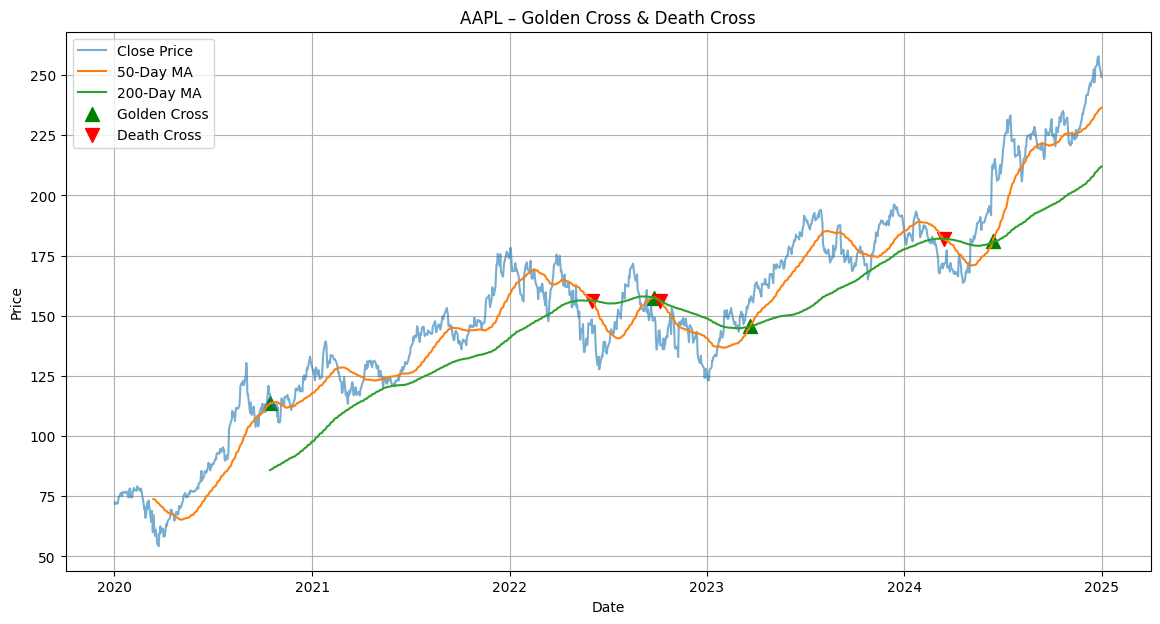

In [22]:
plt.figure(figsize=(14,7))

plt.plot(df['Close'], label='Close Price', alpha=0.6)
plt.plot(df['MA50'], label='50-Day MA')
plt.plot(df['MA200'], label='200-Day MA')

# Golden Cross
plt.scatter(
    df[df['Position'] == 1].index,
    df['MA50'][df['Position'] == 1],
    marker='^',
    color='green',
    s=100,
    label='Golden Cross'
)

# Death Cross
plt.scatter(
    df[df['Position'] == -1].index,
    df['MA50'][df['Position'] == -1],
    marker='v',
    color='red',
    s=100,
    label='Death Cross'
)

plt.title(f"{ticker} – Golden Cross & Death Cross")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()
